# MOODEL EKONOMETRYCZNY (REGRESJA LINIOWA) DOTYCZACA WYCENY DIAMENTÓW
* **Model powstał na podstawie danych pobranych z Australijskiej giełdy diamnetów pobranych w 2022 roku,**
**dane zawieraja 27 kolumn gdzie kazda z nich obisuje ceche diamentu. Nie wszystkie z kolumn zostały uzyte do modelowania.**
* **Link do bazy danych -> https://www.kaggle.com/datasets/enashed/diamond-prices**

In [46]:
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.figsize'] = (15, 7)

# PRZYGOTOWANIE I EKSPOLORACJA DANYCH

* **Przegląd całej bazy danych**

In [47]:
pd.set_option('display.max_columns', None)
df= pd.read_csv('diamonds.csv', sep=',')
df

,diamond_id,shape,size,color,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,clarity,cut,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,culet_size,culet_condition,fluor_color,fluor_intensity,lab,total_sales_price,eye_clean,date
0,131328926,Round,0.09000,E,NaN,NaN,NaN,NaN,VVS2,Excellent,Very Good,Very Good,62.70000,59.00000,2.85000,2.87000,1.79000,M,M,N,NaN,NaN,None,IGI,200,NaN,2022-02-24
1,131704776,Round,0.09000,E,NaN,NaN,NaN,NaN,VVS2,Very Good,Very Good,Very Good,61.90000,59.00000,2.84000,2.89000,1.78000,STK,STK,N,NaN,NaN,None,IGI,200,NaN,2022-02-24
2,131584417,Round,0.09000,E,NaN,NaN,NaN,NaN,VVS2,Excellent,Very Good,Very Good,61.10000,59.00000,2.88000,2.90000,1.77000,TN,M,NaN,NaN,NaN,None,IGI,200,NaN,2022-02-24
3,131584416,Round,0.09000,E,NaN,NaN,NaN,NaN,VVS2,Excellent,Very Good,Very Good,62.00000,59.00000,2.86000,2.88000,1.78000,M,STK,NaN,NaN,NaN,None,IGI,200,NaN,2022-02-24
4,131613644,Round,0.09000,E,NaN,NaN,NaN,NaN,VVS2,Very Good,Very Good,Excellent,64.90000,58.50000,2.79000,2.83000,1.82000,STK,STK,N,NaN,NaN,None,IGI,200,NaN,2022-02-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219699,135619262,Round,10.65000,E,NaN,NaN,NaN,NaN,VS1,Excellent,Excellent,Excellent,61.30000,58.00000,14.06000,14.18000,8.66000,M,STK,N,NaN,NaN,None,GIA,1210692,NaN,2022-02-24
219700,135122237,Radiant,5.17000,NaN,Green,NaN,None,Fancy Light,VS2,NaN,Very Good,Very Good,64.80000,65.00000,11.55000,8.81000,5.71000,TK,XTK,NaN,NaN,NaN,None,GIA,1292500,NaN,2022-02-24
219701,135553116,Round,18.07000,E,NaN,NaN,NaN,NaN,VS1,Excellent,Excellent,Excellent,60.20000,59.00000,17.06000,17.10000,10.20000,TN,M,N,NaN,NaN,None,GIA,1315496,NaN,2022-02-24
219702,114752541,Princess,0.90000,NaN,Red,NaN,NaN,Fancy,SI2,NaN,Good,Good,70.80000,72.00000,5.22000,4.90000,3.47000,XTN,VTK,N,NaN,NaN,Faint,GIA,1350000,NaN,2022-02-24


* **Na podstawie literatury usuwam zmienne, które nie sa przydatne w modelowaniu**

In [48]:
del df['diamond_id']
del df['fancy_color_dominant_color']
del df['fancy_color_secondary_color']
del df['fancy_color_overtone']
del df['fancy_color_intensity']
del df['date']
del df['eye_clean']
del df['culet_condition']
del df['fluor_intensity']
del df['symmetry']
del df['polish']

In [49]:
df

,shape,size,color,clarity,cut,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,culet_size,fluor_color,lab,total_sales_price
0,Round,0.09000,E,VVS2,Excellent,62.70000,59.00000,2.85000,2.87000,1.79000,M,M,N,NaN,IGI,200
1,Round,0.09000,E,VVS2,Very Good,61.90000,59.00000,2.84000,2.89000,1.78000,STK,STK,N,NaN,IGI,200
2,Round,0.09000,E,VVS2,Excellent,61.10000,59.00000,2.88000,2.90000,1.77000,TN,M,NaN,NaN,IGI,200
3,Round,0.09000,E,VVS2,Excellent,62.00000,59.00000,2.86000,2.88000,1.78000,M,STK,NaN,NaN,IGI,200
4,Round,0.09000,E,VVS2,Very Good,64.90000,58.50000,2.79000,2.83000,1.82000,STK,STK,N,NaN,IGI,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219699,Round,10.65000,E,VS1,Excellent,61.30000,58.00000,14.06000,14.18000,8.66000,M,STK,N,NaN,GIA,1210692
219700,Radiant,5.17000,NaN,VS2,NaN,64.80000,65.00000,11.55000,8.81000,5.71000,TK,XTK,NaN,NaN,GIA,1292500
219701,Round,18.07000,E,VS1,Excellent,60.20000,59.00000,17.06000,17.10000,10.20000,TN,M,N,NaN,GIA,1315496
219702,Princess,0.90000,NaN,SI2,NaN,70.80000,72.00000,5.22000,4.90000,3.47000,XTN,VTK,N,NaN,GIA,1350000


In [50]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [51]:
dfc=pd.DataFrame()
dfc=df.describe()

In [52]:
dfs=pd.DataFrame()
dfs['kurtosis']=df.kurtosis(numeric_only=True)
dfs=dfs.transpose()

In [53]:
dfx=pd.DataFrame()
dfx['skew']=df.skew(numeric_only=True)
dfx=dfx.transpose()

# Przygotowane i zebrane razem statystyki opisowe dotyczace zmiennych ciągłych, mianowicie po koleii:
* **Rozmiar**
* **Procent głębokości kamienia**
* **Procent rozmiaru 'stółu' kamienia**
* **Długość kamienia**
* **Szerokość kamienia**
* **Wysokość kamienia**
* **Cena kamienia w dolararach**


In [54]:
pd.concat([dfc, dfs, dfx])

,size,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
count,219704.00000,219704.00000,219704.00000,219704.00000,219704.00000,219704.00000,219704.00000
mean,0.75518,61.68379,57.74758,5.54887,5.13562,3.28570,6908.03516
std,0.84589,9.91525,9.95991,1.76393,1.37453,2.05482,25959.43830
min,0.08000,0.00000,0.00000,0.00000,0.00000,0.00000,200.00000
25%,0.31000,61.20000,57.00000,4.35000,4.31000,2.68000,958.00000
50%,0.50000,62.40000,58.00000,5.06000,4.80000,3.03000,1970.00000
75%,1.00000,63.50000,60.00000,6.35000,5.70000,3.63000,5207.00000
max,19.35000,98.70000,94.00000,93.66000,62.30000,76.30000,1449881.00000
kurtosis,66.07437,29.89752,24.68958,41.18609,51.79915,705.80374,588.25591
skew,6.04477,-5.13385,-4.53796,2.29497,2.26976,24.15367,19.40987


* **Transformacja zmiennych pod model regresji liniowej**

In [55]:
df['clarity']=df['clarity'].replace(['I2', 'I3', 'SI3'], 'Different')

df['color']=df['color'].fillna('Diffrent')
df['cut']=df['cut'].fillna('No_cut')
df['cut']=df['cut'].replace(['Good', 'Fair', 'Ideal', 'None'], 'Different')

del df['girdle_max']
df['girdle_min']=df['girdle_min'].fillna(0)
df['girdle_min']=df['girdle_min'].replace(['M', 'STK', 'TN', 'TK', 'VTK', 'XTK', 'VTN', 'XTN', 'STN'], '1')
df.rename(columns={'girdle_min':'girdle'}, inplace=True)

df['culet_size']=df['culet_size'].fillna(0)
df['culet_size']=df['culet_size'].replace(['N', 'VS', 'S', 'M','L','SL','EL','VL'], '1')
df.rename(columns={'culet_size': 'culet'}, inplace=True)

df['fluor_color']=df['fluor_color'].fillna(0)
df['fluor_color']=df['fluor_color'].replace(['Blue', 'Yellow', 'Green', 'White', 'Orange'], '1')

In [56]:
df.isnull().sum()

shape                0
size                 0
color                0
clarity              0
cut                  0
depth_percent        0
table_percent        0
meas_length          0
meas_width           0
meas_depth           0
girdle               0
culet                0
fluor_color          0
lab                  0
total_sales_price    0
dtype: int64

# Przygotowane i zebrane zmienne dotyczące zmiennych binarnych, do których nalezą:

* **Kształt**
* **Kolor**
* **Czystość**
* **Szlif**
* **Gridle 'pierścien' (1 - jesli kamien posia, 0 - jesli nie posiada)**
* **Culet 'szpic' (1 - jesli kamien posia, 0 - jesli nie posiada)**
* **Kolor fluorescencyjny (1 - jesli kamien posia, 0 - jesli nie posiada)**
* **Labolatorium wystawiajace certyfikat**

-------------------PROCENTY------------------------------------
-------------------- shape ------------------------------------
Round              72.05877
Oval                6.30712
Emerald             5.04816
Pear                4.48786
Princess            3.20886
Radiant             2.56254
Heart               2.17292
Cushion Modified    1.81335
Marquise            1.32770
Asscher             0.77195
Cushion             0.24078
Name: shape, dtype: float64
---------------------------------------------------------------


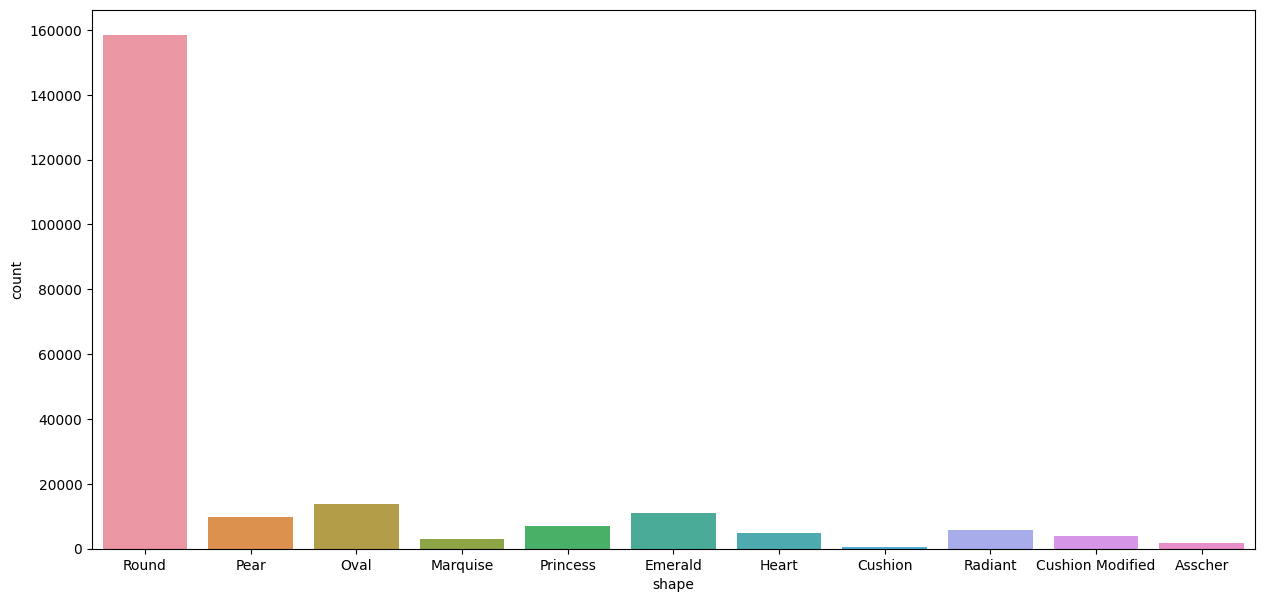

-------------------PROCENTY------------------------------------
-------------------- color ------------------------------------
E          15.06709
F          14.36751
D          14.05209
G          13.28333
H          11.86733
I          10.17915
J           7.69126
K           5.34810
Diffrent    4.17016
L           2.58666
M           1.38732
Name: color, dtype: float64
---------------------------------------------------------------


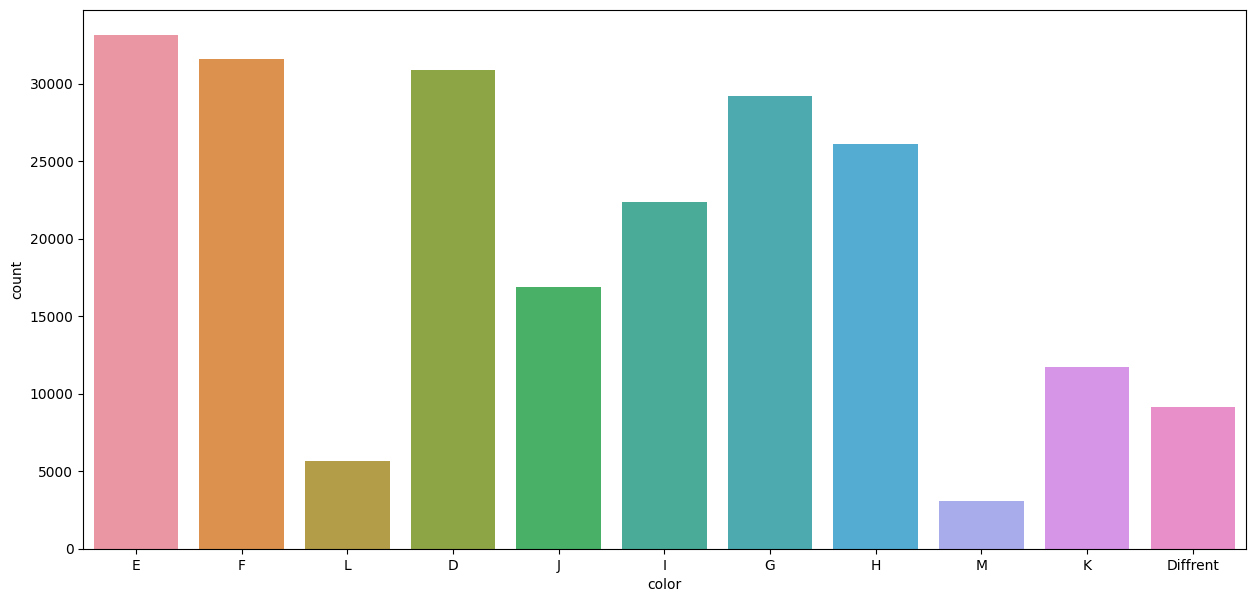

-------------------PROCENTY------------------------------------
-------------------- clarity ------------------------------------
SI1         17.58184
VS2         17.37474
VS1         16.82081
SI2         14.15768
VVS2        13.19275
VVS1        12.68844
IF           4.53974
I1           3.16835
Different    0.47564
Name: clarity, dtype: float64
---------------------------------------------------------------


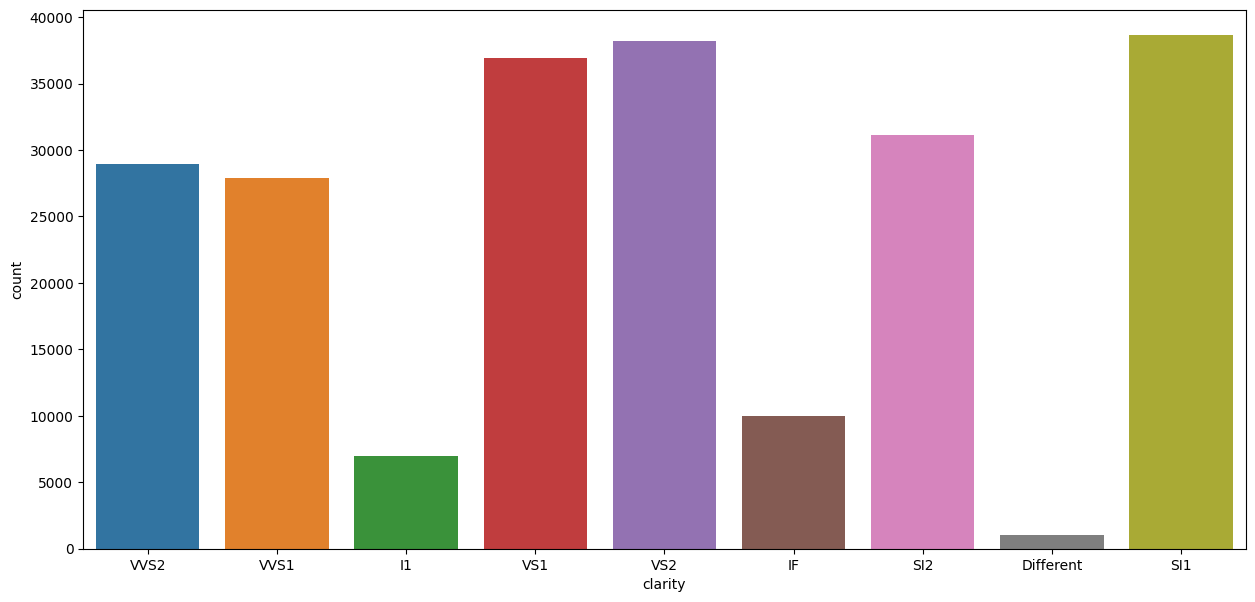

-------------------PROCENTY------------------------------------
-------------------- cut ------------------------------------
Excellent   56.83146
No_cut      27.58575
Very Good   15.56685
Different    0.01593
Name: cut, dtype: float64
---------------------------------------------------------------


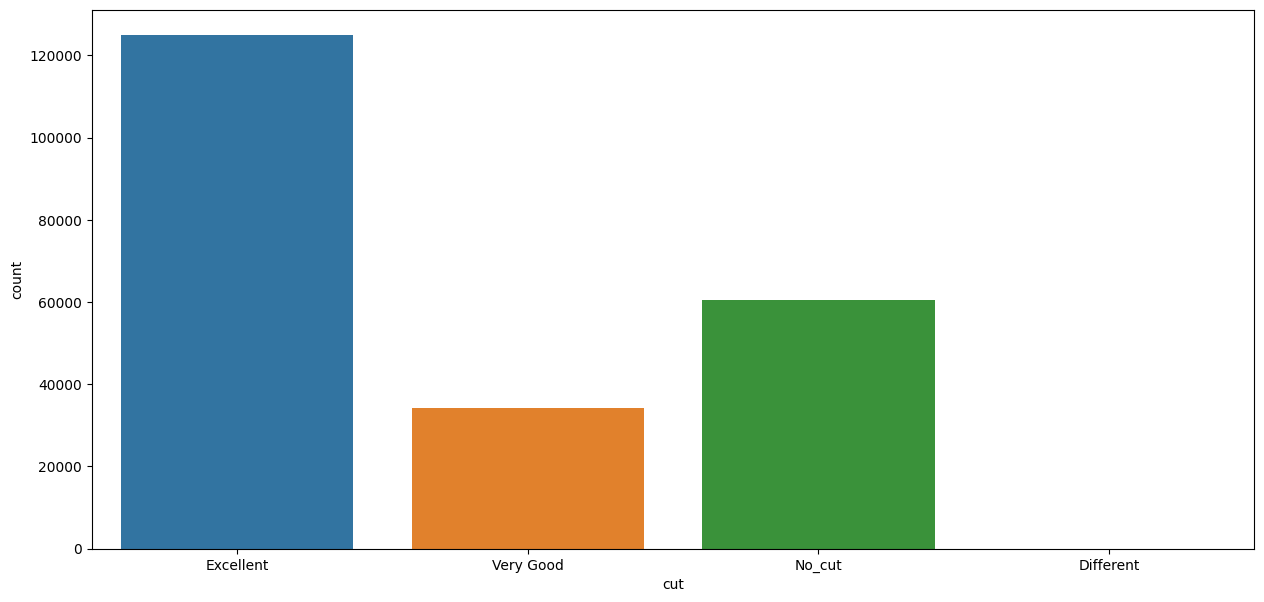

-------------------PROCENTY------------------------------------
-------------------- girdle ------------------------------------
1   62.02482
0   37.97518
Name: girdle, dtype: float64
---------------------------------------------------------------


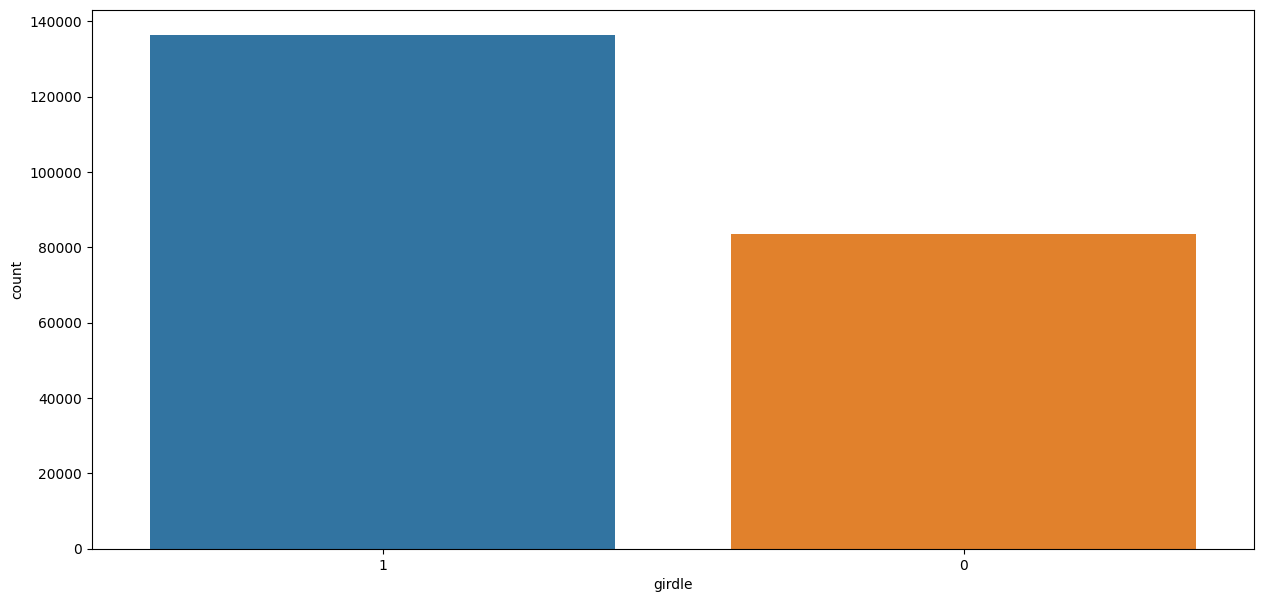

-------------------PROCENTY------------------------------------
-------------------- culet ------------------------------------
1   60.97431
0   39.02569
Name: culet, dtype: float64
---------------------------------------------------------------


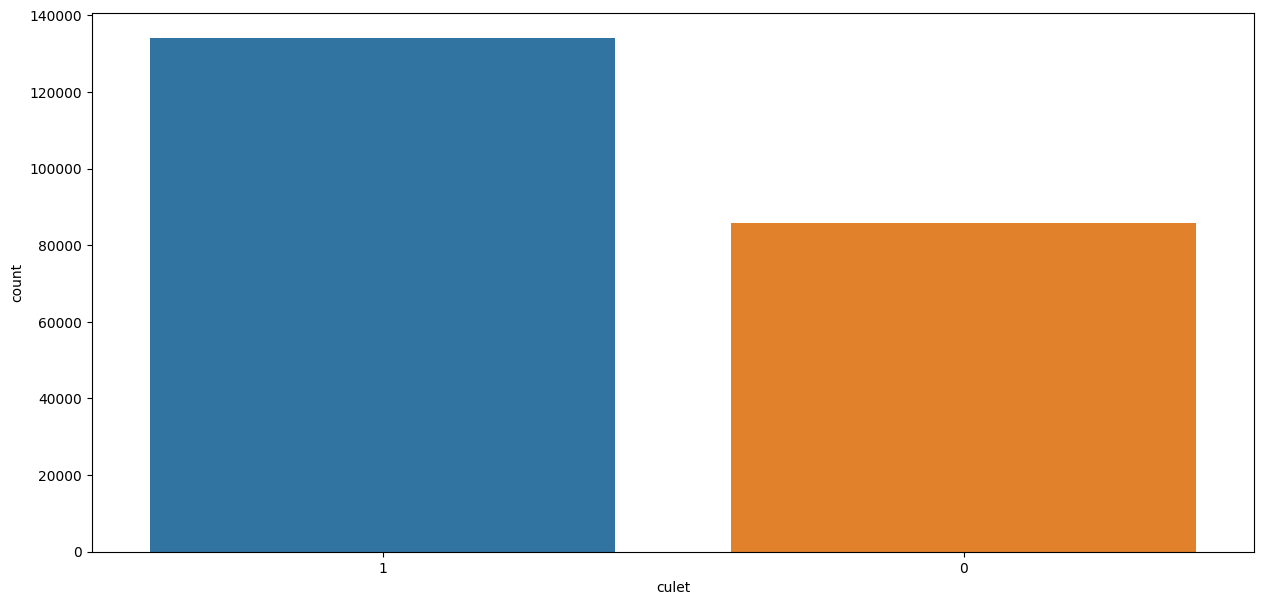

-------------------PROCENTY------------------------------------
-------------------- fluor_color ------------------------------------
0   92.84219
1    7.15781
Name: fluor_color, dtype: float64
---------------------------------------------------------------


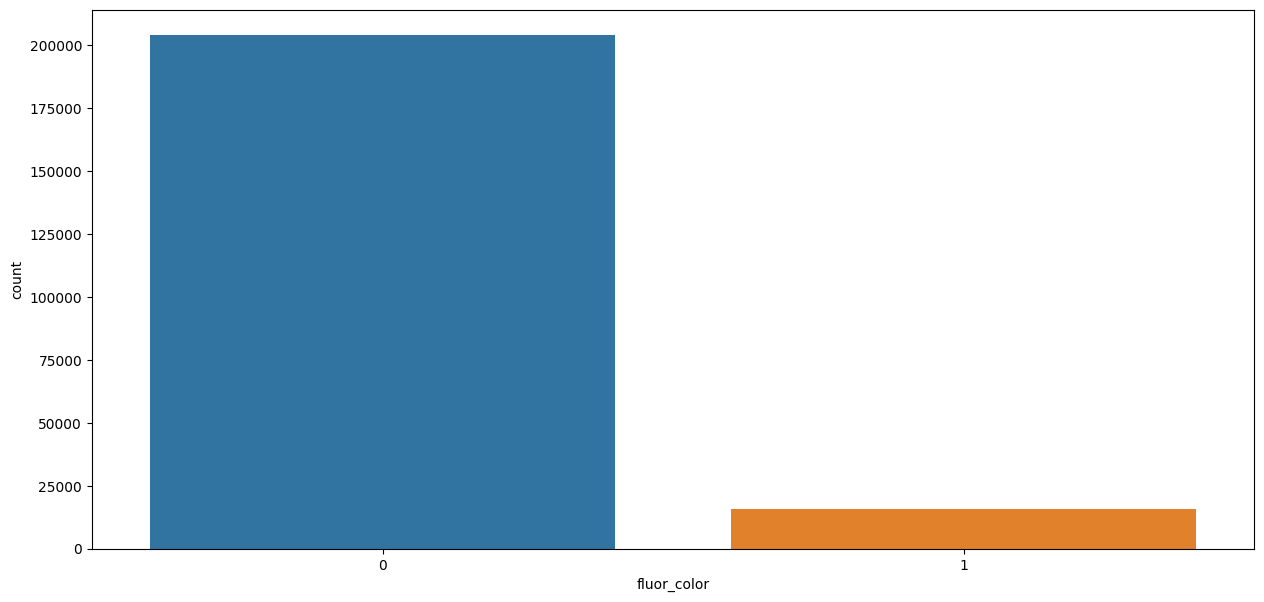

-------------------PROCENTY------------------------------------
-------------------- lab ------------------------------------
GIA   91.22911
IGI    7.22153
HRD    1.54936
Name: lab, dtype: float64
---------------------------------------------------------------


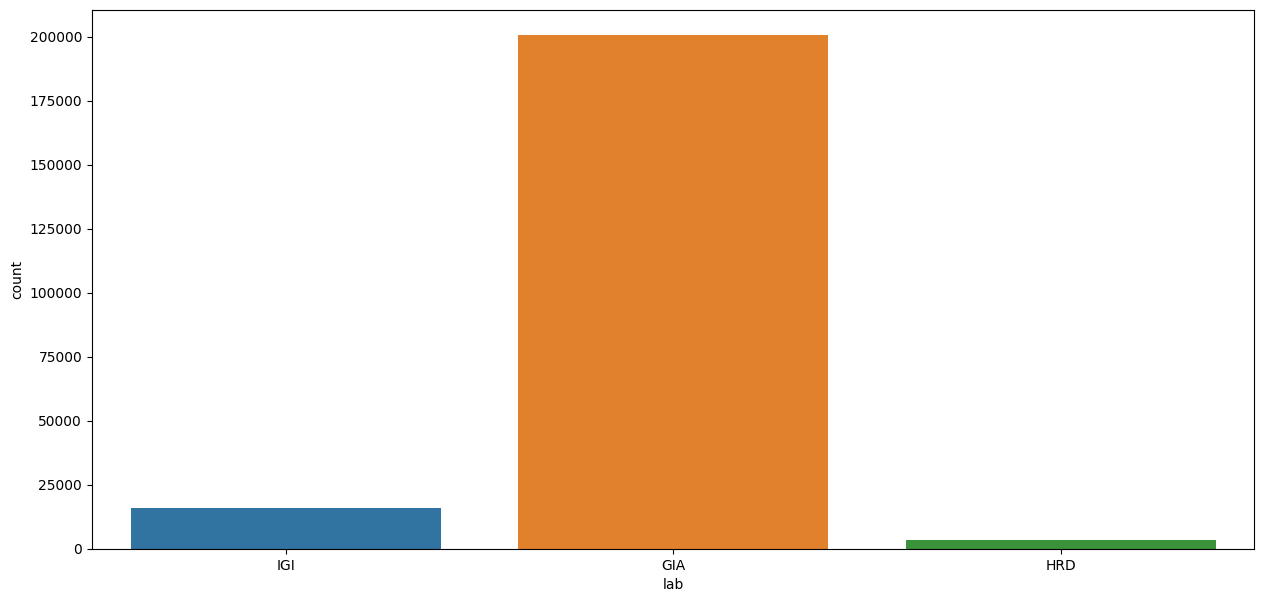

In [57]:
for i in (0,2,3,4,10,11,12,13):
    print('-------------------PROCENTY------------------------------------')
    print('--------------------',df.iloc[:, i].name, '------------------------------------')
    print(df.iloc[:, i].value_counts()/df.iloc[:, i].count()*100)
    print('---------------------------------------------------------------')
    sns.countplot(data=df, x=df.iloc[:, i])
    plt.show()

* **Macierz korelacji przedstawiająca korelacje miedzy zmiennymi ciągłymi**

<AxesSubplot: >

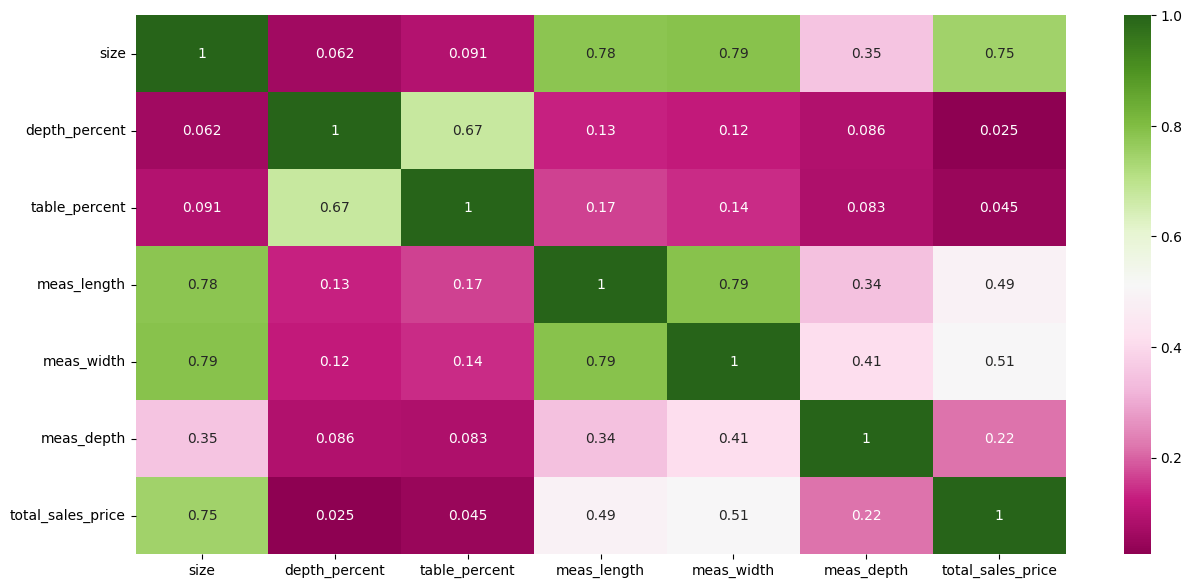

In [58]:
sns.heatmap(df.corr(method = 'pearson'), annot = True, cmap='PiYG')

* **Porównanie rozkładów w postaci macierzy wykresów pomiedzy zmiennymi ciągłymi**

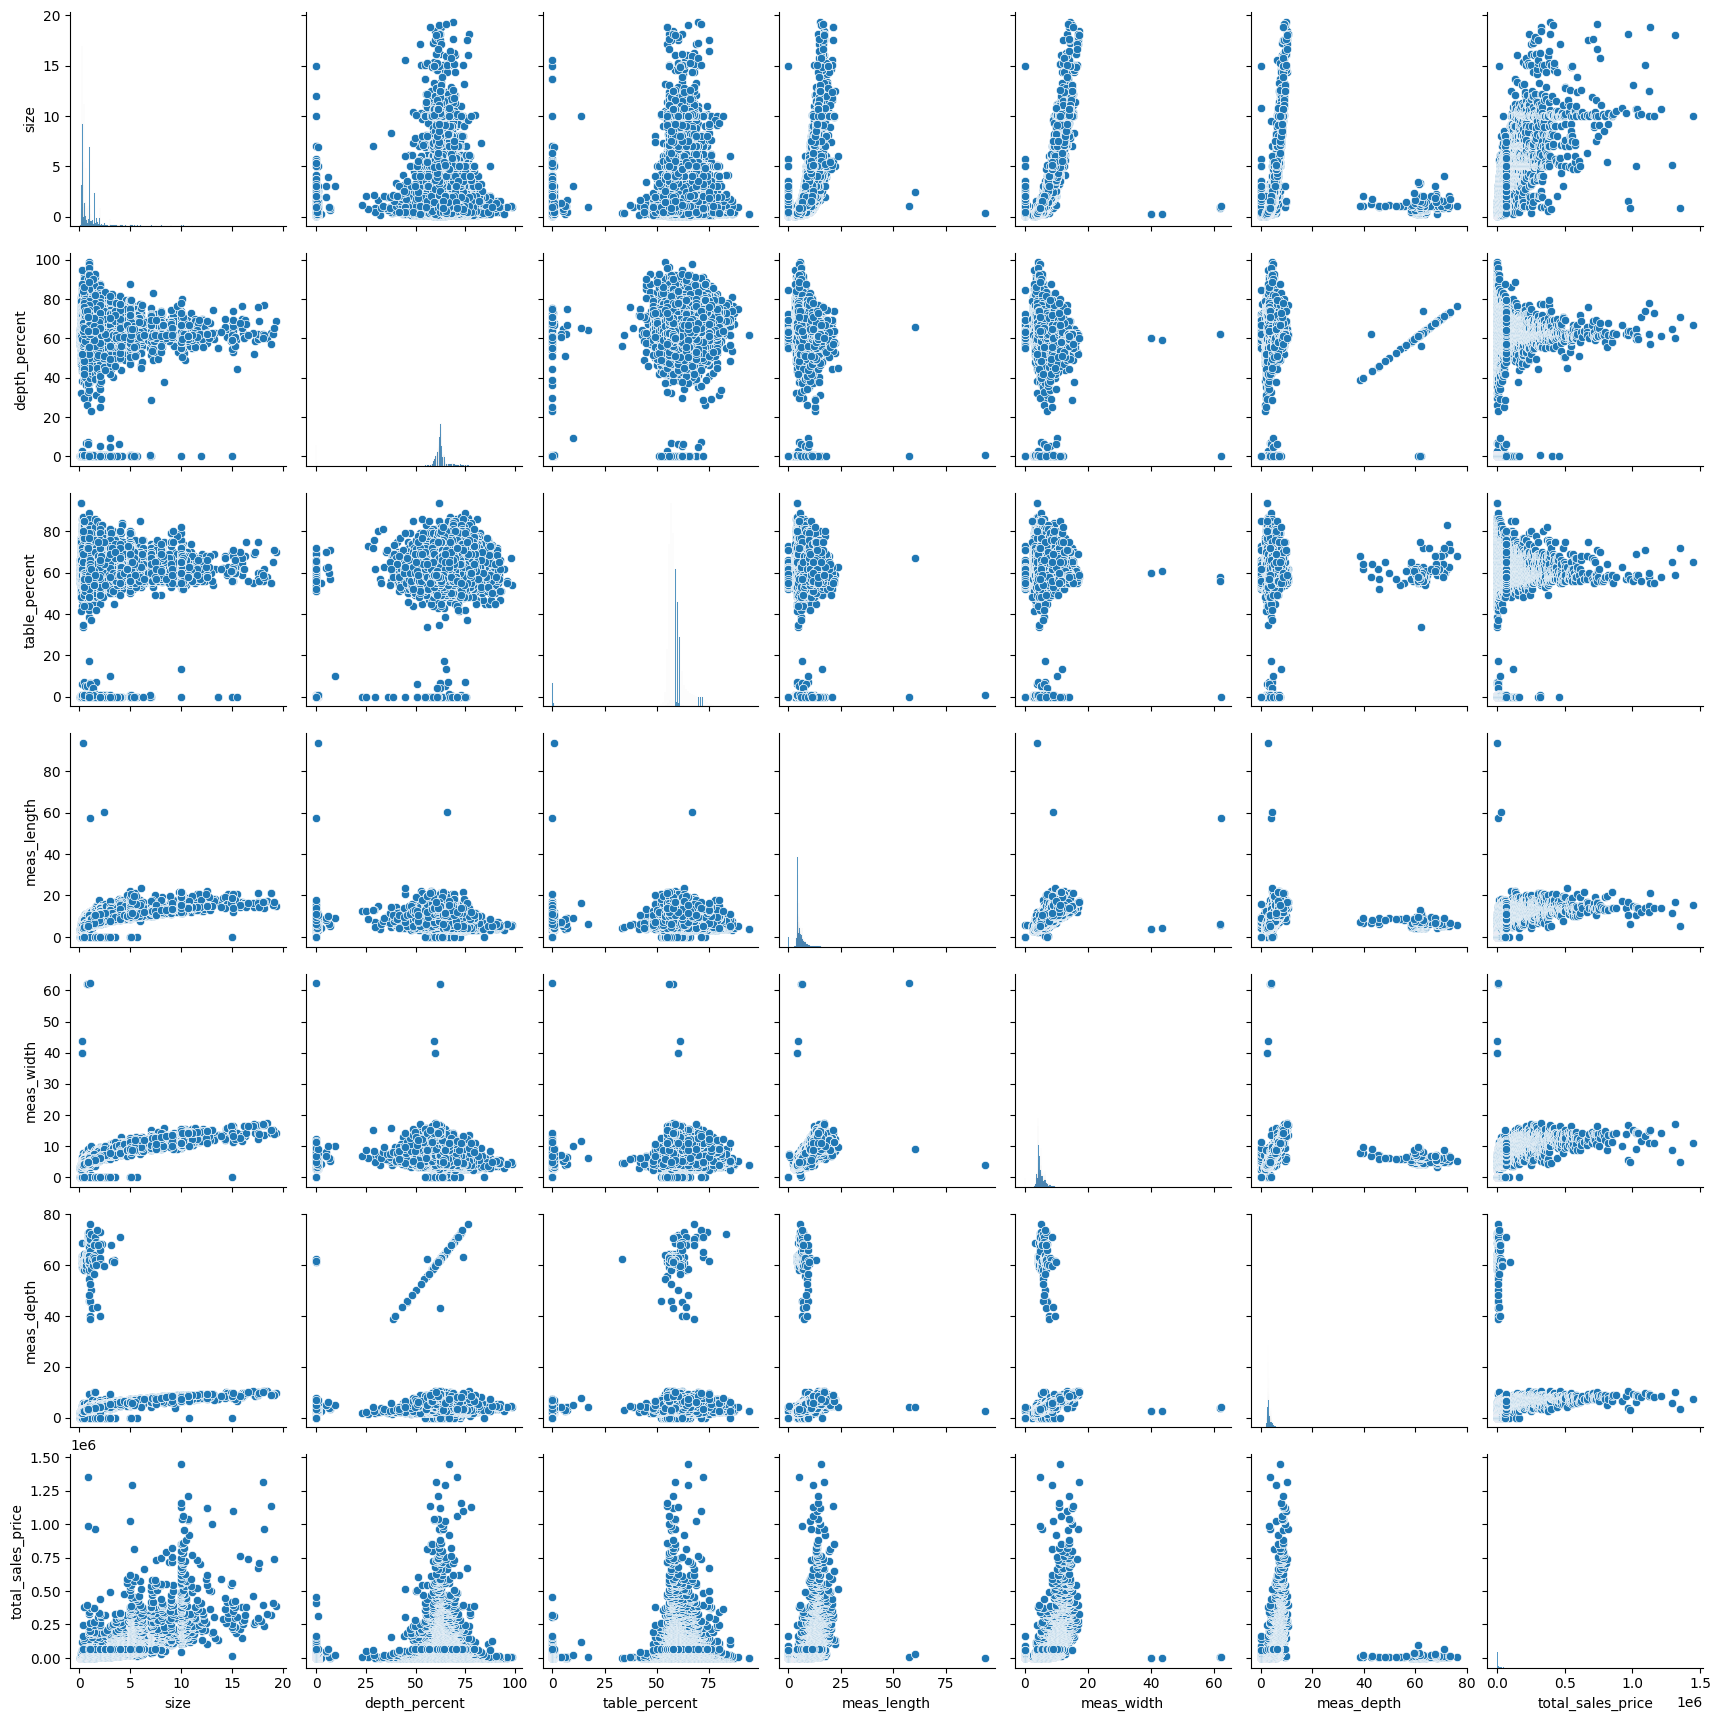

In [59]:
sns.pairplot(df)

# Rozkodowanie zmiennych binarnych na poziomy 0 - 1
* **Poziom bazowy w zmiennej shape to kształt 'Ascher'**
* **Poziom bazowy w zmiennej color to kolor 'color_D'**
* **Poziom bazowy w zmiennej clarity to czystość 'Different'**
* **Poziom bazowy w zmiennej cut to szlif 'Different'**
* **Poziom bazowy w zmiennej lab to labolatorium 'GIA'**

In [60]:
df.dtypes

shape                 object
size                 float64
color                 object
clarity               object
cut                   object
depth_percent        float64
table_percent        float64
meas_length          float64
meas_width           float64
meas_depth           float64
girdle                object
culet                 object
fluor_color           object
lab                   object
total_sales_price      int64
dtype: object

In [61]:
df=pd.get_dummies(df,columns=['shape'], prefix='shape', drop_first=True)
df=pd.get_dummies(df,columns=['color'], prefix='color', drop_first=True)
df=pd.get_dummies(df,columns=['clarity'], prefix='clarity', drop_first=True)
df=pd.get_dummies(df,columns=['cut'], prefix='cut', drop_first=True)
df=pd.get_dummies(df,columns=['lab'], prefix='lab', drop_first=True)

In [62]:
df['fluor_color'] = df['fluor_color'].astype('uint8')
df['culet'] = df['culet'].astype('uint8')
df['girdle'] = df['girdle'].astype('uint8')

In [63]:
df.rename(columns={'shape_Cushion Modified':'shape_Cushion_Modified', 'cut_Very Good':'cut_Very_Good'}, inplace=True)

In [64]:
df

,size,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle,culet,fluor_color,total_sales_price,shape_Cushion,shape_Cushion_Modified,shape_Emerald,shape_Heart,shape_Marquise,shape_Oval,shape_Pear,shape_Princess,shape_Radiant,shape_Round,color_Diffrent,color_E,color_F,color_G,color_H,color_I,color_J,color_K,color_L,color_M,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,cut_Excellent,cut_No_cut,cut_Very_Good,lab_HRD,lab_IGI
0,0.09000,62.70000,59.00000,2.85000,2.87000,1.79000,1,1,0,200,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1
1,0.09000,61.90000,59.00000,2.84000,2.89000,1.78000,1,1,0,200,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
2,0.09000,61.10000,59.00000,2.88000,2.90000,1.77000,1,0,0,200,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1
3,0.09000,62.00000,59.00000,2.86000,2.88000,1.78000,1,0,0,200,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1
4,0.09000,64.90000,58.50000,2.79000,2.83000,1.82000,1,1,0,200,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219699,10.65000,61.30000,58.00000,14.06000,14.18000,8.66000,1,1,0,1210692,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
219700,5.17000,64.80000,65.00000,11.55000,8.81000,5.71000,1,0,0,1292500,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
219701,18.07000,60.20000,59.00000,17.06000,17.10000,10.20000,1,1,0,1315496,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
219702,0.90000,70.80000,72.00000,5.22000,4.90000,3.47000,1,1,0,1350000,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


# BUDOWANIE MODELU REGRESJI LINIOWEJ

In [65]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from stargazer.stargazer import Stargazer
from statsmodels.compat import lzip
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

* **Zlogarytmowanie rozmiaru oraz ceny diamentów wynikajace z literatury, przekształcenie Boxa-Coxa**

In [66]:
df['ltotal_sales_price'] = np.log(df['total_sales_price'])
df['lsize'] = np.log(df['size'])
del df['size']
del df['total_sales_price']

* **Zmienna objasniajaca w modelu to zlogarytmowana cena diamentów, zmienne objasniajace to pozostałe zmienne z ramki danyc**

In [67]:
features = df.columns.tolist()
features.remove('ltotal_sales_price')
wzor1 = 'ltotal_sales_price~' + '+'.join(features)
wzor1

'ltotal_sales_price~depth_percent+table_percent+meas_length+meas_width+meas_depth+girdle+culet+fluor_color+shape_Cushion+shape_Cushion_Modified+shape_Emerald+shape_Heart+shape_Marquise+shape_Oval+shape_Pear+shape_Princess+shape_Radiant+shape_Round+color_Diffrent+color_E+color_F+color_G+color_H+color_I+color_J+color_K+color_L+color_M+clarity_I1+clarity_IF+clarity_SI1+clarity_SI2+clarity_VS1+clarity_VS2+clarity_VVS1+clarity_VVS2+cut_Excellent+cut_No_cut+cut_Very_Good+lab_HRD+lab_IGI+lsize'

**MODEL 1**

In [68]:
m1 = smf.ols(formula=wzor1, data=df).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ltotal_sales_price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                 1.002e+05
Date:                Fri, 24 Mar 2023   Prob (F-statistic):               0.00
Time:                        13:41:52   Log-Likelihood:                -19230.
No. Observations:              219704   AIC:                         3.855e+04
Df Residuals:                  219661   BIC:                         3.899e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  7.6183      0.047    163.242      0.000       7.527       7.710
depth_percent             -0.0016    8.1e-05    -19.472      0.000      -0.002      -0.001
table_percent              0.0004   8.18e-05      4.580      0.000       0.000       0.001
meas_length               -0.0048      0.001     -3.848      0.000      -0.007      -0.002
meas_width                 0.0170      0.001     11.665      0.000       0.014       0.020
meas_depth                -0.0002      0.000     -0.744      0.457      -0.001       0.000
girdle                     0.0530      0.002     33.814      0.000       0.050       0.056
culet                     -0.0453      0.002    -28.381      0.000      -0.048      -0.042
fluor_color               -0.0279      0.002    -12.437      0.000      -0.032      -0.023
shape_Cushion             -0.0271      0.013     -2.055      0.040      -0.053      -0.001
shape_Cushion_Modified    -0.1946      0.009    -22.476      0.000      -0.212      -0.178
shape_Emerald             -0.0097      0.007     -1.343      0.179      -0.024       0.004
shape_Heart                0.0400      0.008      5.168      0.000       0.025       0.055
shape_Marquise             0.0850      0.010      8.779      0.000       0.066       0.104
shape_Oval                 0.1059      0.007     14.337      0.000       0.091       0.120
shape_Pear                 0.1038      0.008     13.065      0.000       0.088       0.119
shape_Princess             0.0162      0.007      2.251      0.024       0.002       0.030
shape_Radiant              0.0067      0.008      0.896      0.370      -0.008       0.021
shape_Round                0.2376      0.012     20.049      0.000       0.214       0.261
color_Diffrent             0.4191      0.004     98.734      0.000       0.411       0.427
color_E                   -0.0462      0.002    -22.021      0.000      -0.050      -0.042
color_F                   -0.0713      0.002    -33.609      0.000      -0.075      -0.067
color_G                   -0.1184      0.002    -54.473      0.000      -0.123      -0.114
color_H                   -0.1860      0.002    -82.478      0.000      -0.190      -0.182
color_I                   -0.3001      0.002   -127.573      0.000      -0.305      -0.295
color_J                   -0.4483      0.003   -174.623      0.000      -0.453      -0.443
color_K                   -0.6167      0.003   -212.592      0.000      -0.622      -0.611
color_L                   -0.7764      0.004   -201.661      0.000      -0.784      -0.769
color_M                   -0.9227      0.005   -182.571      0.000      -0.933      -0.913
clarity_I1                 0.2501      0.009     28.519      0.000       0.233       0.267
clarity_IF                 0.9086      0.009    105.307      0.000       0.892  

# Metoda od ogolu do szczegolu, pozbywamy sie zmiennych statystycznie nieistotnych
**Za pomiom istotnosci przyjmujemy 5%**

In [69]:
hip1='(meas_depth=0)'

In [70]:
m1.f_test(hip1)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=0.553656897217932, p=0.4568281216435619, df_denom=2.2e+05, df_num=1>

* **Brak podstaw do odrzucenia H0 zmienna statystycznie nieistotna**

**MODEL 2**

In [71]:
wzor2 = wzor1.replace('+meas_depth','')
wzor2

'ltotal_sales_price~depth_percent+table_percent+meas_length+meas_width+girdle+culet+fluor_color+shape_Cushion+shape_Cushion_Modified+shape_Emerald+shape_Heart+shape_Marquise+shape_Oval+shape_Pear+shape_Princess+shape_Radiant+shape_Round+color_Diffrent+color_E+color_F+color_G+color_H+color_I+color_J+color_K+color_L+color_M+clarity_I1+clarity_IF+clarity_SI1+clarity_SI2+clarity_VS1+clarity_VS2+clarity_VVS1+clarity_VVS2+cut_Excellent+cut_No_cut+cut_Very_Good+lab_HRD+lab_IGI+lsize'

In [72]:
m2=smf.ols(formula=wzor2, data=df).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ltotal_sales_price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                 1.027e+05
Date:                Fri, 24 Mar 2023   Prob (F-statistic):               0.00
Time:                        13:41:53   Log-Likelihood:                -19230.
No. Observations:              219704   AIC:                         3.854e+04
Df Residuals:                  219662   BIC:                         3.898e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  7.6181      0.047    163.240      0.000       7.527       7.710
depth_percent             -0.0016   8.09e-05    -19.515      0.000      -0.002      -0.001
table_percent              0.0004   8.18e-05      4.588      0.000       0.000       0.001
meas_length               -0.0048      0.001     -3.852      0.000      -0.007      -0.002
meas_width                 0.0169      0.001     11.644      0.000       0.014       0.020
girdle                     0.0529      0.002     33.806      0.000       0.050       0.056
culet                     -0.0453      0.002    -28.374      0.000      -0.048      -0.042
fluor_color               -0.0278      0.002    -12.430      0.000      -0.032      -0.023
shape_Cushion             -0.0270      0.013     -2.052      0.040      -0.053      -0.001
shape_Cushion_Modified    -0.1945      0.009    -22.472      0.000      -0.212      -0.178
shape_Emerald             -0.0096      0.007     -1.335      0.182      -0.024       0.005
shape_Heart                0.0401      0.008      5.179      0.000       0.025       0.055
shape_Marquise             0.0851      0.010      8.793      0.000       0.066       0.104
shape_Oval                 0.1060      0.007     14.351      0.000       0.092       0.121
shape_Pear                 0.1039      0.008     13.081      0.000       0.088       0.119
shape_Princess             0.0162      0.007      2.249      0.024       0.002       0.030
shape_Radiant              0.0068      0.008      0.903      0.367      -0.008       0.022
shape_Round                0.2376      0.012     20.051      0.000       0.214       0.261
color_Diffrent             0.4191      0.004     98.737      0.000       0.411       0.427
color_E                   -0.0462      0.002    -22.017      0.000      -0.050      -0.042
color_F                   -0.0713      0.002    -33.605      0.000      -0.075      -0.067
color_G                   -0.1183      0.002    -54.468      0.000      -0.123      -0.114
color_H                   -0.1860      0.002    -82.474      0.000      -0.190      -0.182
color_I                   -0.3001      0.002   -127.571      0.000      -0.305      -0.295
color_J                   -0.4483      0.003   -174.622      0.000      -0.453      -0.443
color_K                   -0.6167      0.003   -212.593      0.000      -0.622      -0.611
color_L                   -0.7764      0.004   -201.662      0.000      -0.784      -0.769
color_M                   -0.9227      0.005   -182.570      0.000      -0.933      -0.913
clarity_I1                 0.2501      0.009     28.519      0.000       0.233       0.267
clarity_IF                 0.9086      0.009    105.307      0.000       0.892       0.926
clarity_SI1                0.5523      0.008     66.503      0.000       0.536  

In [73]:
hip2='(meas_depth=0), (shape_Radiant=0)'

In [74]:
m1.f_test(hip2)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=0.6844017592138063, p=0.5043929626048336, df_denom=2.2e+05, df_num=2>

* **Brak podstaw do odrzucenia H0 obie zmienne sa nieistotne statystycznie**

**MODEL 3**

In [75]:
wzor3 = wzor2.replace('+shape_Radiant','')
wzor3

'ltotal_sales_price~depth_percent+table_percent+meas_length+meas_width+girdle+culet+fluor_color+shape_Cushion+shape_Cushion_Modified+shape_Emerald+shape_Heart+shape_Marquise+shape_Oval+shape_Pear+shape_Princess+shape_Round+color_Diffrent+color_E+color_F+color_G+color_H+color_I+color_J+color_K+color_L+color_M+clarity_I1+clarity_IF+clarity_SI1+clarity_SI2+clarity_VS1+clarity_VS2+clarity_VVS1+clarity_VVS2+cut_Excellent+cut_No_cut+cut_Very_Good+lab_HRD+lab_IGI+lsize'

In [76]:
m3 =smf.ols(formula=wzor3, data=df).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ltotal_sales_price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                 1.053e+05
Date:                Fri, 24 Mar 2023   Prob (F-statistic):               0.00
Time:                        13:41:55   Log-Likelihood:                -19231.
No. Observations:              219704   AIC:                         3.854e+04
Df Residuals:                  219663   BIC:                         3.897e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  7.6228      0.046    164.355      0.000       7.532       7.714
depth_percent             -0.0016   8.09e-05    -19.520      0.000      -0.002      -0.001
table_percent              0.0004   8.18e-05      4.607      0.000       0.000       0.001
meas_length               -0.0046      0.001     -3.752      0.000      -0.007      -0.002
meas_width                 0.0167      0.001     11.637      0.000       0.014       0.020
girdle                     0.0529      0.002     33.796      0.000       0.050       0.056
culet                     -0.0453      0.002    -28.384      0.000      -0.048      -0.042
fluor_color               -0.0278      0.002    -12.423      0.000      -0.032      -0.023
shape_Cushion             -0.0321      0.012     -2.695      0.007      -0.055      -0.009
shape_Cushion_Modified    -0.2000      0.006    -32.620      0.000      -0.212      -0.188
shape_Emerald             -0.0150      0.004     -3.558      0.000      -0.023      -0.007
shape_Heart                0.0352      0.006      6.360      0.000       0.024       0.046
shape_Marquise             0.0793      0.007     10.996      0.000       0.065       0.093
shape_Oval                 0.1006      0.004     23.507      0.000       0.092       0.109
shape_Pear                 0.0983      0.005     19.826      0.000       0.089       0.108
shape_Princess             0.0112      0.005      2.433      0.015       0.002       0.020
shape_Round                0.2327      0.011     22.153      0.000       0.212       0.253
color_Diffrent             0.4196      0.004     99.634      0.000       0.411       0.428
color_E                   -0.0462      0.002    -22.026      0.000      -0.050      -0.042
color_F                   -0.0713      0.002    -33.612      0.000      -0.075      -0.067
color_G                   -0.1184      0.002    -54.472      0.000      -0.123      -0.114
color_H                   -0.1860      0.002    -82.473      0.000      -0.190      -0.182
color_I                   -0.3001      0.002   -127.570      0.000      -0.305      -0.295
color_J                   -0.4482      0.003   -174.620      0.000      -0.453      -0.443
color_K                   -0.6167      0.003   -212.594      0.000      -0.622      -0.611
color_L                   -0.7764      0.004   -201.663      0.000      -0.784      -0.769
color_M                   -0.9227      0.005   -182.568      0.000      -0.933      -0.913
clarity_I1                 0.2501      0.009     28.519      0.000       0.233       0.267
clarity_IF                 0.9086      0.009    105.304      0.000       0.892       0.925
clarity_SI1                0.5523      0.008     66.503      0.000       0.536       0.569
clarity_SI2                0.4308      0.008     51.715      0.000       0.414  

* **Porównaie wszystkich 3 modeli po zastosowaniu metody od ogolu doszczegółu**

In [77]:
wydruk = Stargazer([m1,m2,m3])
wydruk

# Diagnosytka modelu

In [78]:
nam1 = ['lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']

* **Test RESET w dwóch wersjach**

In [79]:
test1=sms.linear_reset(m3, power = 3, test_type = 'fitted')
test1

/Users/remigiuszsmigielski/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/diagnostic.py:1081: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  aug = res.fittedvalues[:, None]


<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=3948.389630357309, p-value=0.0, df_denom=2>

In [80]:
test2=sms.linear_reset(m3, power = 3, test_type = 'exog')
test2

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=8820.099445052003, p-value=0.0, df_denom=10>

**Model nie posiada poprawnej formy funkcyjnej**

* **Testy Breuschapagana i Wheita**

In [81]:
test3 = sms.het_breuschpagan(m3.resid, m3.model.exog)
lzip(nam1, test3)

[('lagrange multiplier statistic', 52289.60617980374),
 ('p-value', 0.0),
 ('f-value', 1715.2186708943223),
 ('f p-value', 0.0)]

In [82]:
test4 = sms.het_white(m3.resid, m3.model.exog)
lzip(nam1, test4)

[('lagrange multiplier statistic', 90285.66865574924),
 ('p-value', 0.0),
 ('f-value', 221.75615253477665),
 ('f p-value', 0.0)]

**W modelu występuje problem heteroscedastyczności, stosujemy macierz odporna wheita**

**MODEL 4**

In [83]:
m4=smf.ols(formula=wzor3, data=df).fit(cov_type='HC0')
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ltotal_sales_price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                 8.881e+04
Date:                Fri, 24 Mar 2023   Prob (F-statistic):               0.00
Time:                        13:43:51   Log-Likelihood:                -19231.
No. Observations:              219704   AIC:                         3.854e+04
Df Residuals:                  219663   BIC:                         3.897e+04
Df Model:                          40                                         
Covariance Type:                  HC0                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  7.6228      0.130     58.773      0.000       7.369       7.877
depth_percent             -0.0016      0.000    -14.690      0.000      -0.002      -0.001
table_percent              0.0004   9.64e-05      3.910      0.000       0.000       0.001
meas_length               -0.0046      0.002     -1.894      0.058      -0.009       0.000
meas_width                 0.0167      0.003      5.220      0.000       0.010       0.023
girdle                     0.0529      0.002     25.489      0.000       0.049       0.057
culet                     -0.0453      0.002    -20.419      0.000      -0.050      -0.041
fluor_color               -0.0278      0.004     -7.357      0.000      -0.035      -0.020
shape_Cushion             -0.0321      0.015     -2.092      0.036      -0.062      -0.002
shape_Cushion_Modified    -0.2000      0.022     -8.944      0.000      -0.244      -0.156
shape_Emerald             -0.0150      0.006     -2.518      0.012      -0.027      -0.003
shape_Heart                0.0352      0.010      3.505      0.000       0.016       0.055
shape_Marquise             0.0793      0.012      6.651      0.000       0.056       0.103
shape_Oval                 0.1006      0.008     13.118      0.000       0.086       0.116
shape_Pear                 0.0983      0.009     10.636      0.000       0.080       0.116
shape_Princess             0.0112      0.006      1.918      0.055      -0.000       0.023
shape_Round                0.2327      0.010     24.393      0.000       0.214       0.251
color_Diffrent             0.4196      0.016     26.025      0.000       0.388       0.451
color_E                   -0.0462      0.001    -36.401      0.000      -0.049      -0.044
color_F                   -0.0713      0.001    -55.686      0.000      -0.074      -0.069
color_G                   -0.1184      0.001    -89.890      0.000      -0.121      -0.116
color_H                   -0.1860      0.001   -133.351      0.000      -0.189      -0.183
color_I                   -0.3001      0.001   -210.278      0.000      -0.303      -0.297
color_J                   -0.4482      0.002   -292.038      0.000      -0.451      -0.445
color_K                   -0.6167      0.002   -356.135      0.000      -0.620      -0.613
color_L                   -0.7764      0.002   -330.765      0.000      -0.781      -0.772
color_M                   -0.9227      0.004   -259.396      0.000      -0.930      -0.916
clarity_I1                 0.2501      0.021     12.193      0.000       0.210       0.290
clarity_IF                 0.9086      0.020     46.273      0.000       0.870       0.947
clarity_SI1                0.5523      0.020     28.188      0.000       0.514       0.591
clarity_SI2                0.4308      0.020     21.936      0.000       0.392  

# Obserwacje odstające oraz wspołczynnik wariancji inflacji

* **Wyliczenie reszt w modelu**

In [84]:
residuals = m4.resid

* **Wyliczenie poziomu dzwigni**

In [85]:
h_lev = (2*len(m4.params))/m4.nobs
leverage = m4.get_influence().hat_matrix_diag

* **Wyliczenie odległości COOKA**

In [86]:
cooksd = m4.get_influence().cooks_distance[0]

* **Przedstawienie ramki danych z potencjalnymi obserwacjami odstającymi, posiadającymi reszty wieksze od 2 lub mniejsze od -2, dzwignia wieksza niz wyliczona dla modelu oraz odległością COOKA posortowana malejąco**

In [87]:
results = pd.DataFrame({'Residuals': residuals, 'Leverage': leverage, 'Cook': cooksd})
results = results[(results["Residuals"] >= 2) | (results["Residuals"] <= -2)]
results = results[(results['Leverage'] >= h_lev)]
results = results.sort_values('Cook', ascending=False)
results

,Residuals,Leverage,Cook
199059,-4.60803,0.00227,0.01690
215062,3.92779,0.00122,0.00659
183026,3.38762,0.00132,0.00531
219261,5.15873,0.00053,0.00495
180055,3.26985,0.00131,0.00490
...,...,...,...
211478,2.13217,0.00037,0.00059
162241,2.05706,0.00039,0.00057
217617,2.01541,0.00040,0.00057
209548,2.04290,0.00039,0.00057


In [88]:
df1=df
del df1['meas_depth']
del df1['shape_Radiant']
del df1['ltotal_sales_price']
df1

,depth_percent,table_percent,meas_length,meas_width,girdle,culet,fluor_color,shape_Cushion,shape_Cushion_Modified,shape_Emerald,shape_Heart,shape_Marquise,shape_Oval,shape_Pear,shape_Princess,shape_Round,color_Diffrent,color_E,color_F,color_G,color_H,color_I,color_J,color_K,color_L,color_M,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,cut_Excellent,cut_No_cut,cut_Very_Good,lab_HRD,lab_IGI,lsize
0,62.70000,59.00000,2.85000,2.87000,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,-2.40795
1,61.90000,59.00000,2.84000,2.89000,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,-2.40795
2,61.10000,59.00000,2.88000,2.90000,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,-2.40795
3,62.00000,59.00000,2.86000,2.88000,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,-2.40795
4,64.90000,58.50000,2.79000,2.83000,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,-2.40795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219699,61.30000,58.00000,14.06000,14.18000,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,2.36556
219700,64.80000,65.00000,11.55000,8.81000,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1.64287
219701,60.20000,59.00000,17.06000,17.10000,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,2.89425
219702,70.80000,72.00000,5.22000,4.90000,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,-0.10536


* **Wspołczynnik wariancji inflacji**

In [89]:
x = df1.iloc[:, :-1]
vif = pd.DataFrame()
vif['variables'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

In [90]:
vif =vif.sort_values('VIF', ascending=False)
vif.head(60)

,variables,VIF
34,cut_Excellent,347.08924
15,shape_Round,242.09359
3,meas_width,147.04446
2,meas_length,143.41070
36,cut_Very_Good,94.29691
35,cut_No_cut,84.38786
0,depth_percent,79.79789
1,table_percent,69.76212
28,clarity_SI1,37.10290
31,clarity_VS2,36.70374


* **Zmienne, których VIF jest powyej 10 mogą powodować w modelu wspołliniowość niedokładną**